# 📑 Project Index: Clustering Analysis
1. **Importing Libraries**
2. **Import Dataframes**
3. **Data Cleaning and Feature Engineering**
4. **Elbow Technique**
5. **Run K-Means**
6. **Visualizations**  
    - Age vs. Trip Duration
    - Start Hour vs. Age
    - Start Hour vs. Trip Duration
    - Cluster Distribution (Bar Plot)
    - Optional: Map Visualization (Stations)
7. **Discussion: Do the Clusters Make Sense?**
8. **Descriptive Statistics for Each Cluster**
9. **Next Steps: How These Results Can Be Useful**
10. **Export Data**

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler   # For data standardization
from sklearn.cluster import KMeans   # For K-Means clustering
from sklearn.metrics import silhouette_samples, silhouette_score   # For Silhouette analysis
from sklearn.metrics import pairwise_distances   # To calculate total within-cluster distance
import warnings

In [2]:
# Data path
path =r'C:\Users\ANITA BOADU\New York City Bikes'

In [3]:
df=pd.read_csv(os.path.join(path,'Data','Prepared Data','citibike_cleaned_latest.csv'),index_col=False)

In [4]:
print(df.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'trip_duration_min', 'age'],
      dtype='object')


In [5]:
# Check first rows
print(df.head())

  trip_id  bike_id    weekday  start_hour           start_time  \
0  LnQzQk    16013     Monday          18  2013-09-09 18:18:00   
1  IL9boN    15230   Thursday          18  2013-09-12 18:38:00   
2  46clGB    17942  Wednesday          19  2013-09-18 19:44:00   
3  v7vdFt    19683   Saturday          11  2013-09-28 11:54:00   
4  VGBsb5    18024   Saturday          18  2013-09-07 18:08:00   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  end_station_id  \
0               -73.991382  2013-09-09 18:35:00             334   
1               -74.002472  2013-09-

## Data Cleaning and Feature Engineering
The dataset has been thoroughly cleaned and prepared for analysis. Key steps and enhancements include:

- **Trip Duration**

   - Converted from seconds (tripduration) to minutes (trip_duration_minutes) for improved interpretability.
- **Birth Year / Age**

   - Transformed birth_year into age.
   - Missing values in age were filled with the **median** to ensure a complete dataset for analysis.
- **New Columns Introduced**

    1. trip_duration_minutes – representing the duration of trips in minutes.
    2. age – representing the rider’s age with missing values imputed.
These changes ensure the dataset is clean, consistent, and ready for **visualization and further analysis**.

In [6]:
# Select numerical features for clustering
numerical_features = ['trip_duration_min', 'age']

X = df[numerical_features]

In [7]:
# Since trip durations and ages have different scales, we standardize before clustering.)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Show result
print("Standardized Array:\n", X_scaled[:10])  # first 10 rows

Standardized Array:
 [[ 0.26848232  0.77130782]
 [-0.44971531 -0.68236257]
 [-0.83321889 -1.26383073]
 [-0.48457927 -1.16691937]
 [ 2.53986947 -0.19780578]
 [-0.71816782 -0.97309665]
 [-0.34860981 -1.74838752]
 [-1.00405231  0.67439646]
 [-0.30154347 -1.65147617]
 [-0.44797211 -0.68236257]]


## Elbow Technique

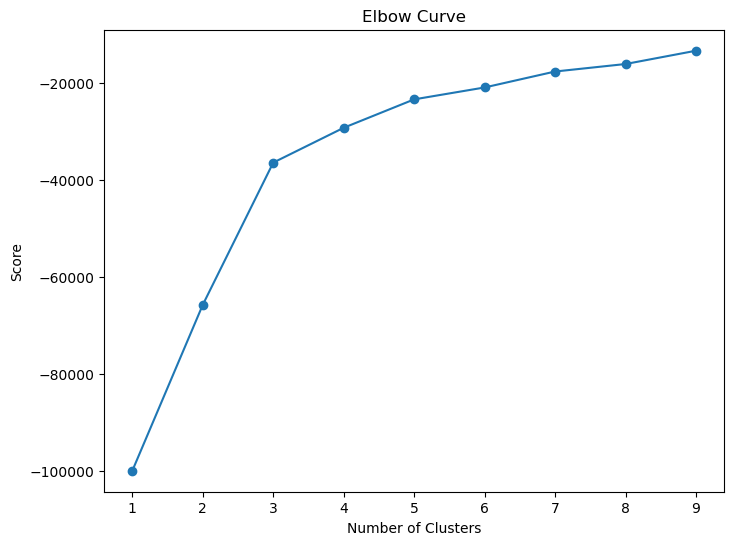

In [9]:
import os
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import KMeans

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "kmeans_elbow_curve.png")

# Define range of clusters
num_cl = range(1, 10)

# Fit KMeans for each k
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot elbow curve
plt.figure(figsize=(8, 6))
pl.plot(num_cl, score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 🧩 Elbow Method for Optimal Number of Clusters
To determine the optimal number of clusters for our standardized dataset, we applied the Elbow Method.
The method involves running the K-Means algorithm with various values of k (the number of clusters) and plotting the resulting scores, which represent the negative within-cluster sum of squares.

🔹 **Elbow Curve**
The plot illustrates how the K-Means score changes as the number of clusters increases. 
- While adding more clusters reduces the within-cluster variation and improves the score, the gains become marginal after k = 3, creating a clear “elbow” in the curve.

✅ Interpretation
The elbow observed around k ≈ 3 indicates that selecting three clusters is an appropriate choice for this dataset, as it strikes a balance between keeping the model simple and effectively capturing the underlying group structure in the data.

🔹 **Choosing the Optimal Number of Clusters**

Based on the **Elbow Curve** generated in the previous step, the steep improvement in the score slows down significantly after k = 3.

- For **k = 1 → 2 → 3**, the score improves sharply, indicating that adding more clusters reduces variation substantially.
- After **k = 3**, the curve starts to flatten, and the gain in reducing within-cluster variation becomes marginal.
- This "elbow" point at **k = 3** suggests that three clusters provide the best trade-off between model simplicity and capturing meaningful groupings in the data.

✅ **Decision**

We will move forward with **k = 3** clusters for the k-means algorithm, as this choice produces well-defined clusters that offer meaningful insights while keeping the model appropriately simple.

# Run K-Means

In [10]:
# Run KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [11]:
# Check rows with clusters
print(df.head())

  trip_id  bike_id    weekday  start_hour           start_time  \
0  LnQzQk    16013     Monday          18  2013-09-09 18:18:00   
1  IL9boN    15230   Thursday          18  2013-09-12 18:38:00   
2  46clGB    17942  Wednesday          19  2013-09-18 19:44:00   
3  v7vdFt    19683   Saturday          11  2013-09-28 11:54:00   
4  VGBsb5    18024   Saturday          18  2013-09-07 18:08:00   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               521          8 Ave & W 31 St               40.750450   

   start_station_longitude             end_time  ...     end_station_name  \
0               -73.991382  2013-09-09 18:35:00  ...      W 20 St & 7 Ave   
1               

In [12]:
# Count how many trips fall into each cluster
df['cluster'].value_counts()

cluster
1    27184
2    12653
0    10163
Name: count, dtype: int64

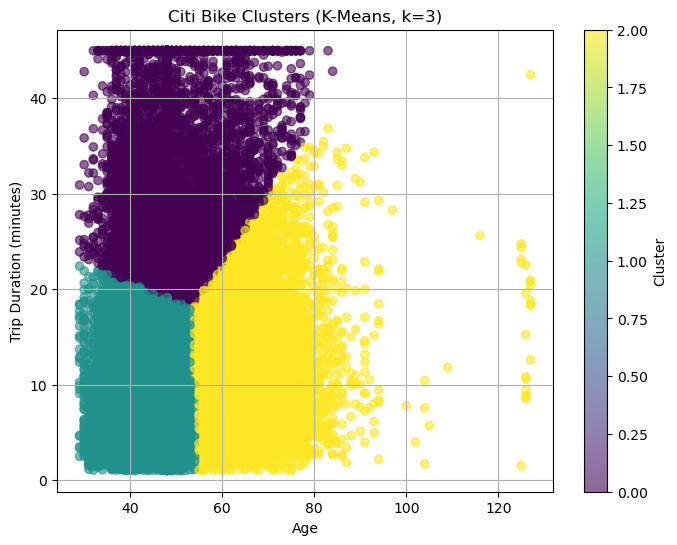

In [13]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "citi_bike_clusters.png")

# Create scatterplot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    df['age'],
    df['trip_duration_min'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Age")
plt.ylabel("Trip Duration (minutes)")
plt.title("Citi Bike Clusters (K-Means, k=3)")
plt.colorbar(label="Cluster")
plt.grid(True)

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 🔎 Interpretation of Clustering Results

The scatterplot above shows the results of applying **K-Means clustering with k=3** on the Citi Bike dataset.

- Each **dot** represents a single trip, positioned according to the rider’s **Age** (x-axis) and **Trip Duration (minutes)** (y-axis).
- The **color** indicates the cluster assignment by the algorithm

## 📌 Observations

1. **Cluster 0 (e.g., purple)**

- It primarily includes younger to middle-aged riders 
- Spans a broad range of trip durations, with a notable concentration of longer trips.

2. **Cluster 1 (e.g., teal)**

- Includes younger riders with relatively short trip durations.
- This group represents quick, short-distance trips.

3. **Cluster 2 (e.g., yellow)**

- It represents older riders across a range of ages.  
- Trips typically lasting short to medium durations and relatively few extended trips.

## ✅ Insights

- The clustering highlights distinct riding patterns by **age and trip duration**.
- Younger riders tend to be split between short quick trips and longer rides.
- Older riders generally cluster into shorter to medium trip durations.

This segmentation can help in understanding different rider behaviors, which could be valuable for targeted marketing, service planning, or resource allocation.

# Few Different Visulaization

# 📊 1. Scatterplot: Age vs. Trip Duration

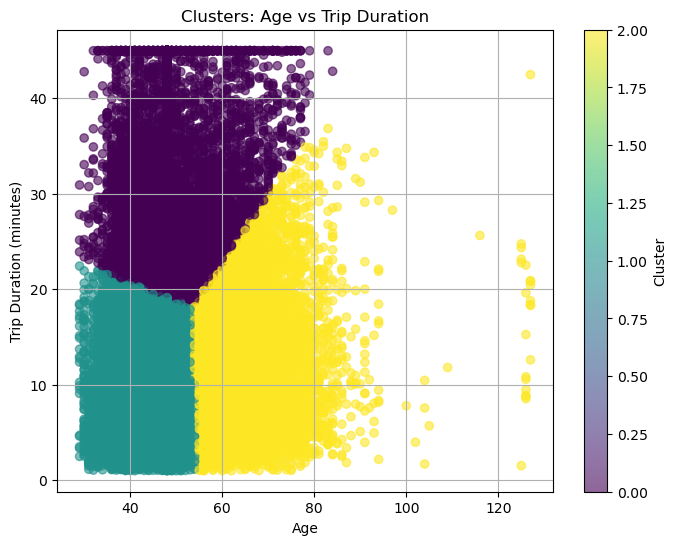

In [14]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "clusters_age_vs_trip_duration.png")

# Scatterplot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    df['age'],
    df['trip_duration_min'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Age")
plt.ylabel("Trip Duration (minutes)")
plt.title("Clusters: Age vs Trip Duration")
plt.colorbar(label="Cluster")
plt.grid(True)

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 📊 Scatterplot: Age vs. Trip Duration

This scatterplot shows the clustering results based on **rider age (x-axis)** and **trip duration in minutes (y-axis)**.

- Each point represents a single trip.
- Colors indicate the cluster assignments from the K-Means algorithm.

### 🔎 Observations

1. **Cluster 0 (e.g., teal)**

- Younger riders, mostly with shorter trips.
- Represents quick, short-distance rides.

2. **Cluster 1 (e.g., purple)**

- Spread across younger to middle-aged riders.
- Includes longer trip durations, showing a different riding pattern compared to Cluster 0.

3. **Cluster 2 (e.g., yellow)**

- Represents older riders across a range of ages.
- Trips are generally of short-to-medium duration.

### ✅ Insights

The clusters reveal that **age is a strong factor influencing trip duration**.

- Younger riders are divided into short vs. long trip clusters.
- Older riders tend to cluster more toward **shorter trips**, with fewer long-duration rides.

# 📊 2. Scatterplot: Start Hour vs. Age

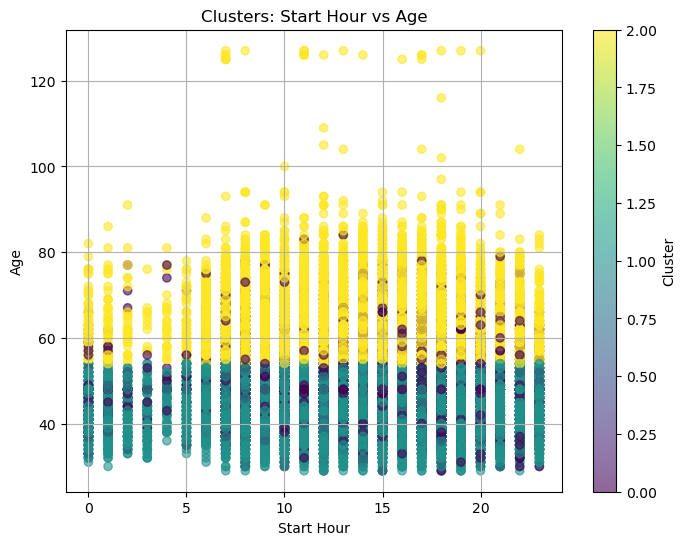

In [15]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "clusters_start_hour_vs_age.png")

# Scatterplot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    df['start_hour'],
    df['age'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Start Hour")
plt.ylabel("Age")
plt.title("Clusters: Start Hour vs Age")
plt.colorbar(label="Cluster")
plt.grid(True)

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 📊 Scatterplot: Start Hour vs. Age

This scatterplot shows the clusters by **trip start hour (x-axis)** and **rider age (y-axis)**.

- Each point corresponds to an individual trip
- The color denotes the cluster to which it has been assigned.

### 🔎 Observations

1. **Cluster 0 (teal)**

- Primarily concentrated among younger to middle-aged riders.

- Spread relatively evenly across all starting hours of the day.

- Indicates that younger riders are active at various times throughout the day.

2.  **Cluster 1 (purple)**

- The age range is similar to Cluster 0, but the overall density is lower

- Trips take place throughout most hours, though with somewhat greater variability.

3. **Cluster 2 (yellow)**

- This group consists of older riders, with a wide age distribution that includes some unusually high values, likely due to outliers.

- They are active throughout the day, with no pronounced preference for any specific start time

### ✅ Insights

- **Clusters are not strongly separated by start hour** — all rider groups use bikes throughout the day.
- The main separation comes from **age differences**, which remain visible here as well.
- Start hour appears less influential in clustering compared to **age and trip duration**.



# 📊 3. Scatterplot: Start Hour vs. Trip Duration

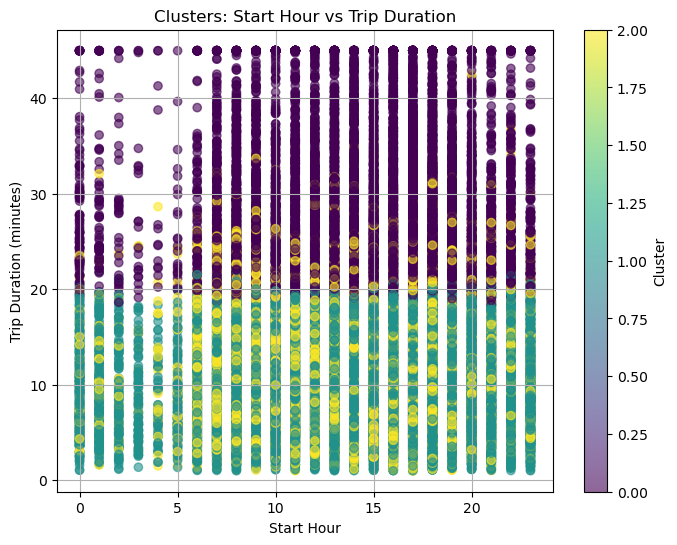

In [16]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "clusters_start_hour_vs_trip_duration.png")

# Scatterplot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    df['start_hour'],
    df['trip_duration_min'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Start Hour")
plt.ylabel("Trip Duration (minutes)")
plt.title("Clusters: Start Hour vs Trip Duration")
plt.colorbar(label="Cluster")
plt.grid(True)

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 📊 Scatterplot: Start Hour vs. Trip Duration

This scatterplot shows the clusters by **trip start hour (x-axis)** and **trip duration in minutes (y-axis)**.

- Each point represents a trip.
- The color shows the assigned cluster.

### 🔎 Observations

1. **Cluster 0 (teal)**

- Predominantly takes short trips, mostly lasting less than 15 minutes

- Active throughout the day at all hours

- This group consists of frequent riders who mainly travel short distances.

2. **Cluster 1 (purple)**

- Characterized by longer trips, typically ranging from 20 to over 45 minutes

- Trips occur consistently throughout the day.

- Indicates a group of riders who frequently take extended trips, independent of the time of day

3. **Cluster 2 (yellow)**

- Primarily takes medium-length trips, lasting between 10 and 25 minutes

- Active across all hours of the day, showing no pronounced time-of-day preference

### ✅ Insights

- Clustering is primarily driven by trip duration, not by start time

- All clusters exhibit activity throughout the entire day, indicating that time of day does not strongly differentiate rider behavior.

- Rather, the clusters capture distinct trip duration patterns that are consistent across all hours

# 📊 4. Bar Plot: Cluster Distribution

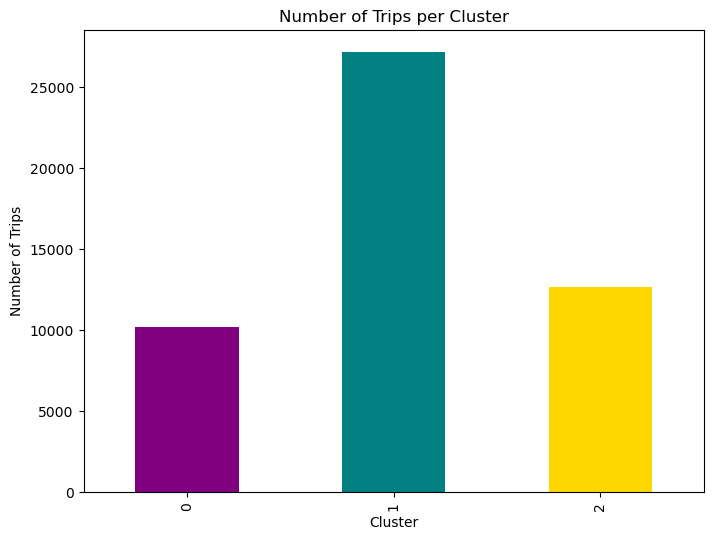

In [17]:
import os
import matplotlib.pyplot as plt

# Output directory
output_dir = r"C:\Users\ANITA BOADU\New York City Bikes\Analysis\Visualizations"
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, "trips_per_cluster.png")

# Bar plot of number of trips per cluster
plt.figure(figsize=(8, 6))
df['cluster'].value_counts().sort_index().plot(
    kind='bar',
    color=['purple', 'teal', 'gold']
)

plt.xlabel("Cluster")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Cluster")

# Save figure
plt.savefig(output_file, dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## 📊 Bar Plot: Cluster Distribution

This bar chart shows the number of trips in each cluster.

### ✅ Key Points

- Cluster 1 (teal) is the largest, encompassing most trips

- Cluster 0 (purple) and Cluster 2 (yellow) are smaller but still significant

- This distribution suggests that most riders exhibit similar trip behaviors (Cluster 1), whereas the other clusters represent more specialized patterns.

# 📊 5. Optional: Map Visualization (Stations)

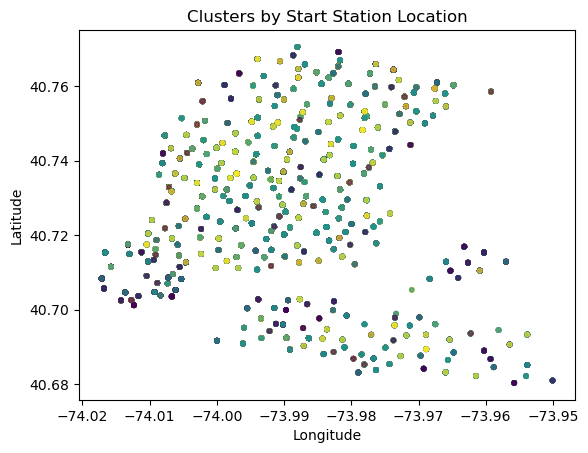

In [19]:
plt.scatter(df['start_station_longitude'], df['start_station_latitude'], 
            c=df['cluster'], cmap='viridis', alpha=0.6, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters by Start Station Location")
plt.show()

## 📊 Map Visualization: Clusters by Start Station Location

This scatterplot maps the **start station locations** using **longitude (x-axis)** and **latitude (y-axis)**.
The colors represent the assigned clusters.

### 🔎 Observations

- All three clusters are spread across the city’s bike network.

- No strong spatial separation between clusters — each cluster appears in most areas.

- This suggests that station geography is not a key driver of the clustering outcome.

### ✅ Insights

- Clusters are better explained by rider behavior—such as age and trip duration—than by station location

- Since all clusters appear throughout the city, different rider types use bikes across neighborhoods rather than being confined to specific areas

- This highlights that the clustering is driven by rider behavior rather than by location.



# 🧠 Discussion: Do the Clusters Make Sense?

The K-Means clustering with k=3 produced groups that are logical and interpretable:

### ✅ Why the Clusters Make Sense

1. **Age and Trip Duration as Key Drivers**

- The clusters distinctly group younger riders taking shorter trips, younger to middle-aged riders taking longer trips, and older riders whose trips are mostly short to medium in length.

- These patterns align with typical usage: younger riders often combine commuting (short trips) and leisure (longer trips), whereas older riders generally favor shorter, more practical trips.

2. **Consistency Across Time**

- Clusters are observed consistently across all start times, which aligns with the fact that trip purpose—such as short commutes versus long leisure rides—is not tied to specific hours.

- This indicates that rider characteristics play a greater role than the time of day.

3. **Geographical Spread**

- Clusters are spread across the city, indicating that station location does not determine group membership.

- This makes sense because the clustering is driven by **behavioral factors**—such as age and trip duration—rather than by geography







# ⚠️ Limitations & Further Exploration

- **Outliers in Age**: Some riders have extremely high recorded ages (e.g., 100+ years), which may be data entry errors and could distort cluster boundaries.

- **Other Variables**: Features like subscriber type or gender were excluded (since K-Means only handles numerical variables), but these may provide additional insights if encoded.

- **Number of Clusters** : While k=3 gave a clear elbow point, testing other values (k=4 or k=5) could reveal sub-groups, such as splitting long-duration riders further.

# 📝 Conclusion

Overall, the clusters are **well-defined** and offer valuable insights into rider behavior. **Trip duration** and **rider age** emerge as the primary factors differentiating the groups, while **time of day and location have a smaller influence**. 

Further refinement—such as addressing outliers or incorporating additional features—could enhance the precision of the segmentation.


# Basic descriptive statistics for each cluster

In [20]:
# Basic descriptive statistics for each cluster
df.groupby('cluster').agg({
    'trip_duration_min': ['mean', 'median'],
    'age': ['mean', 'median'],
    'start_hour': ['mean', 'median']
})

trip_duration_min                   age        start_hour       
                     mean     median       mean median       mean median
cluster                                                                 
0               29.146525  26.950000  48.617436   48.0  14.542458   15.0
1                9.749741   9.100000  44.187647   45.0  14.243415   15.0
2               10.898548   9.816667  63.760294   62.0  13.615269   14.0

# 📊 Descriptive Statistics by Cluster

The table above shows the mean and median values for **trip duration (minutes), age**, and **start hour** across the three clusters.

## 🔎 Findings

1. **Cluster 0**

- Average trip duration: **~29 minutes** (much longer than other groups).
- Average rider age: **~48 years**.
- Trips typically start around **2–3 PM (median 15h)**.

👉 Represents **middle-aged riders taking longer trips**.

2. **Cluster 1**

- Average trip duration: **~9–10 minutes** (short rides).
- Average rider age: **~43 years**.
- Trips also cluster around **afternoon hours (15h median)**.

👉 Represents **middle-aged riders with short, frequent trips**.

3. **Cluster 2**

- Average trip duration: **~11 minutes** (slightly longer than Cluster 1, but still short).
- Average rider age: **~63 years** (significantly older).
- Start hours are spread out, with a **median around 2 PM**.

👉 Represents **older riders taking mostly short trips**.






## ✅ Insights

- **Trip Duration** clearly separates Cluster 0 (long trips) from Clusters 1 and 2 (short trips).

- **Age** is another strong driver:
    - Cluster 2 is distinctly older (60+).
    - Clusters 0 and 1 represent younger/middle-aged riders.
    
- **Start Hour** is consistent across clusters (mostly afternoon), suggesting **time of day is not a key differentiator**.

Overall, the clusters **make sense**: they represent meaningful rider segments based on age and trip duration patterns.


# 🚀 Next Steps: How These Results Can Be Useful


The clustering results offer a foundation for deeper analysis and actionable insights. In the next steps of the analytics pipeline, these clusters could be leveraged to:

1. **Customer Segmentation & Personalization**

    - Create targeted promotions, such as discounts for riders who take long trips or for older users
    
    - Customize subscription plans based on rider behavior, distinguishing between short-trip and long-trip users.
  
2. **Operational Planning**

    - Distribute bikes and docks more effectively by analyzing demand patterns for short- versus long-trip riders.
    
    - Enhance bike availability during peak afternoon hours, when usage across all clusters is highest
 
3. **Predictive Modeling**

    - Incorporate cluster labels as additional features in supervised models, such as those predicting churn, trip demand, or rider lifetime value
    
    - Improve forecasting accuracy by including behavioral groupings in the models.
    
    
4. **Product & Service Development**

    - Create services tailored to different age groups, such as enhanced safety features or easy-access stations for older riders.
    
    - Offer new ride packages, such as bundles designed for frequent short trips or longer leisure rides."
    

## ✅ Conclusion

Clustering offers **behavioral segmentation** that can inform both **business strategy** and **data science modeling**. Future steps could involve integrating these clusters into predictive models, experimenting with different values of k to refine the segmentation, and incorporating additional variables—such as gender or subscription type—for deeper insights."


In [21]:
# Export clustered dataset to CSV

export_path = os.path.join(path, 'Data', 'Prepared Data', 'citi_bike_clusters.csv')
df.to_csv(export_path, index=False)

print(f"File successfully exported to: {export_path}")


File successfully exported to: C:\Users\ANITA BOADU\New York City Bikes\Data\Prepared Data\citi_bike_clusters.csv
